In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm
from scipy.constants import h, hbar, c, alpha, m_e, e, epsilon_0, atomic_mass, pi, physical_constants
a_0 = physical_constants['Bohr radius'][0]

En_h = alpha**2.0 * m_e * c**2.0;
E_h = 4.35974465054e-18;
scl = c*10**-9 * En_h /(h * c);

In [34]:
data_new = np.load('data/StarkMapData_n_69-74_E_0-78_0-78_1_B_1-5776-new.npy')
data_old = np.load('data/StarkMapData_n_69-74_E_0-78_0-78_1_B_1-5776-old.npy')

In [36]:
state_73s = 69**2 + 70**2 + 71**2 + 72**2 + 1
state_71s = 69**2 + 70**2 + 1
state_70c = 69**2 + 70**2

print('--- 73s-71s ---')

transition_energy_new = data_new[0,state_73s-1] - data_new[0,state_71s-1]
print(data_new[0,state_73s-1]* scl)
print( 'new: ', transition_energy_new * scl)

transition_energy_old = data_old[0,state_73s-1] - data_old[0,state_71s-1]
print(data_old[0,state_73s-1]* scl)
print( 'old: ', transition_energy_old * scl)

print('--- 73s-70c ---')

transition_energy_new = data_new[0,state_73s-1] - data_new[0,state_70c-1]
print( 'new: ', transition_energy_new * scl)

transition_energy_old = data_old[0,state_73s-1] - data_old[0,state_70c-1]
print( 'old: ', transition_energy_old * scl)

--- 73s-71s ---
-626.050588104
new:  35.1704567857
-626.05058867
old:  35.1704568238
--- 73s-70c ---
new:  37.8739389926
old:  37.8739384263


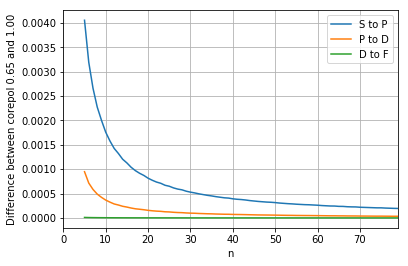

In [46]:
s_p = []
p_d = []
d_f = []
n_vals = np.arange(5,80)
for n in n_vals:
    n_1,l_1, m_1 = n, 0, 0
    n_2, l_2, m_2 = n+1, 1, 0
    s_p.append(np.abs(stark_int(n_1, n_2, l_1, l_2, m_1, m_2, rmin=0.65)
                       -stark_int(n_1, n_2, l_1, l_2, m_1, m_2, rmin=1.00)))
    p_d.append(np.abs(stark_int(n_1, n_2, l_1+1, l_2+1, m_1, m_2, rmin=0.65)
                       -stark_int(n_1, n_2, l_1+1, l_2+1, m_1, m_2, rmin=1.00)))
    d_f.append(np.abs(stark_int(n_1, n_2, l_1+2, l_2+2, m_1, m_2, rmin=0.65)
                       -stark_int(n_1, n_2, l_1+2, l_2+2, m_1, m_2, rmin=1.00)))
    
plt.plot(n_vals, s_p, label='S to P')
plt.plot(n_vals, p_d, label='P to D')
plt.plot(n_vals, d_f, label='D to F')
plt.xlabel('n')
plt.ylabel('Difference between corepol 0.65 and 1.00')
plt.grid()
plt.xlim([0, np.max(n_vals)])
plt.legend()

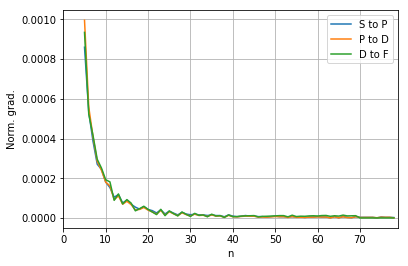

In [64]:
plt.plot(n_vals[:-1], np.abs(np.diff(np.array(s_p))), label='S to P')
plt.plot(n_vals[:-1], np.abs(np.diff(np.array(p_d)*(np.max(s_p)/np.max(p_d)))), label='P to D')
plt.plot(n_vals[:-1], np.abs(np.diff(np.array(d_f)*(np.max(s_p)/np.max(d_f)))), label='D to F')
plt.xlabel('n')
plt.ylabel('Norm. grad.')
plt.grid()
plt.xlim([0, np.max(n_vals)])
plt.legend()